In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img
import glob

In [2]:
def preprocess_image(path, resize_dim=(64, 64), noise_factor=0.1):
    # Load the image using load_img
    image = load_img(path)

    # Resize the image (adjust based on your model's input size)
    image = tf.image.resize(image, resize_dim, method='nearest')  # TensorFlow operation for resizing

    # Convert back to a tensor (if needed)
    image = tf.convert_to_tensor(image)

    # Convert to grayscale (optional, adjust based on model)
    if len(image.shape) == 3:
        image = tf.image.rgb_to_grayscale(image)
    # Normalize pixel values
    image = tf.cast(image, tf.float32) / 255.

    # Add noise 
    noisy_image = image + noise_factor * tf.random.normal(shape=image.shape)
    # Clip noisy image values to be between 0 and 1 
    noisy_image = tf.clip_by_value(noisy_image, 0.0, 1.0)

    return noisy_image

In [3]:
# Data preparation
celeba_path = "E:\Demo\celeba\img_align_celeba/" # Replace with your data path
# Find all image files
train_image_paths = glob.glob(celeba_path + '*.jpg')  # Modify for .png or other formats

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13724\1302449227.py:2: SyntaxWarning: invalid escape sequence '\D'
  celeba_path = "E:\Demo\celeba\img_align_celeba/" # Eeplace with your data path


In [4]:
# Preprocess images using the existing function
train_images = [preprocess_image(path) for path in train_image_paths]
train_images = tf.stack(train_images)

In [5]:
# Test image 
test_image_path = 'E:\Demo\Grayscale.jpg' # Replace with your noisy image path
test_image = preprocess_image(test_image_path)
# Add noise to the test image 
noise_factor = 0.1
noise_test_image = test_image + noise_factor * tf.random.normal(shape=test_image.shape)
# Clip noisy image values to be between 0 and 1 
noise_test_image = tf.clip_by_value(noise_test_image, 0.0, 1.0)

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13724\1972079588.py:2: SyntaxWarning: invalid escape sequence '\D'
  test_image_path = 'E:\Demo\Grayscale.jpg' # Replace with your noisy image path


In [6]:
# Define the model architecture 
input_img = layers.Input(shape=(train_images.shape[1], train_images.shape[2], 1))  # Allow for grayscale input

In [7]:
# Encoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

In [8]:
# Decoder
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), padding='same')(x)  # Adjust for grayscale

In [9]:
# Define the autoencoder model
autoencoder = tf.keras.Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')  # Adjust for grayscale

In [10]:
# Train the model 
autoencoder.fit(train_images, train_images, epochs=10, batch_size=32)

Epoch 1/10
6332/6332 ━━━━━━━━━━━━━━━━━━━━ 317s 49ms/step - loss: 0.5437
Epoch 2/10
6332/6332 ━━━━━━━━━━━━━━━━━━━━ 297s 47ms/step - loss: 0.5186
Epoch 3/10
6332/6332 ━━━━━━━━━━━━━━━━━━━━ 258s 41ms/step - loss: 0.5181
Epoch 4/10
6332/6332 ━━━━━━━━━━━━━━━━━━━━ 247s 39ms/step - loss: 0.5241
Epoch 5/10
6332/6332 ━━━━━━━━━━━━━━━━━━━━ 246s 39ms/step - loss: 0.5158
Epoch 6/10
6332/6332 ━━━━━━━━━━━━━━━━━━━━ 249s 39ms/step - loss: 0.5276
Epoch 7/10
6332/6332 ━━━━━━━━━━━━━━━━━━━━ 249s 39ms/step - loss: 0.5177
Epoch 8/10
6332/6332 ━━━━━━━━━━━━━━━━━━━━ 296s 47ms/step - loss: 0.5141
Epoch 9/10
6332/6332 ━━━━━━━━━━━━━━━━━━━━ 295s 47ms/step - loss: 0.5142
Epoch 10/10
6332/6332 ━━━━━━━━━━━━━━━━━━━━ 299s 47ms/step - loss: 0.5156


In [11]:
# Denoise the image
denoised_img = autoencoder.predict(noise_test_image[tf.newaxis, ...])[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


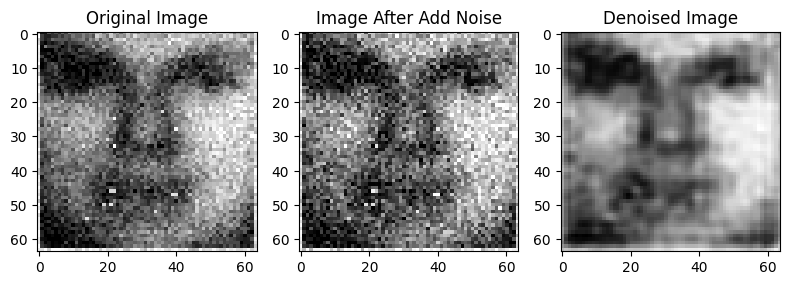

In [12]:
# Display the original, noisy, and denoised images
plt.figure(figsize=(8, 6))
plt.subplot(131)
plt.imshow(test_image, cmap='gray')
plt.title('Original Image')
plt.subplot(132)
plt.imshow(noise_test_image, cmap='gray')
plt.title('Image After Add Noise')
plt.subplot(133)
plt.imshow(denoised_img.squeeze(), cmap='gray')
plt.title('Denoised Image')
plt.tight_layout()
plt.show()